# Financial Data Analysis

## Loading Financial Data from the Web

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats as stats

pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [2]:
start = "2014-10-01"
end = "2021-05-31"

In [3]:
symbol = "BA"

In [4]:
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,127.370003,127.370003,124.309998,124.669998,108.406677,5265200
2014-10-02,124.400002,125.550003,123.839996,124.169998,107.971893,3204500
2014-10-03,124.660004,126.870003,124.660004,126.360001,109.876190,3075900
2014-10-06,127.089996,127.190002,125.379997,126.260002,109.789261,2681000
2014-10-07,125.519997,125.519997,123.290001,123.320000,107.232780,3554900
...,...,...,...,...,...,...
2021-05-24,235.139999,238.500000,232.600006,237.440002,237.440002,10106000
2021-05-25,240.000000,243.779999,239.229996,240.740005,240.740005,12908000
2021-05-26,241.699997,242.490005,239.869995,241.369995,241.369995,7240200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1677 entries, 2014-10-01 to 2021-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1677 non-null   float64
 1   High       1677 non-null   float64
 2   Low        1677 non-null   float64
 3   Close      1677 non-null   float64
 4   Adj Close  1677 non-null   float64
 5   Volume     1677 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 91.7 KB


In [6]:
symbol = ["BA", "MSFT", "^DJI", "EURUSD=X", "GC=F", "BTC-USD"]

Ticker Symbols: <br>
- __BA__: Boeing (US Stock) 
- __MSFT__: Microsoft Corp (US Stock)
- __^DJI__: Dow Jones Industrial Average (US Stock Index)
- __EURUSD=X__: Exchange Rate for Currency Pair EUR/USD (Forex)
- __GC=F__: Gold Price (Precious Metal / Commodity)
- __BTC-USD__: Bitcoin in USD (Cryptocurrency)

In [7]:
df = yf.download(symbol, start, end)
df

[*********************100%***********************]  6 of 6 completed


Adj Close                                                   \
                    BA       BTC-USD  EURUSD=X         GC=F        MSFT   
Date                                                                      
2014-10-01  108.406654    383.614990  1.262834  1214.599976   39.809753   
2014-10-02  107.971909    375.071991  1.262419  1214.199951   39.688328   
2014-10-03  109.876205    359.511993  1.267058  1192.199951   39.974537   
2014-10-04         NaN    328.865997       NaN          NaN         NaN   
2014-10-05         NaN    320.510010       NaN          NaN         NaN   
...                ...           ...       ...          ...         ...   
2021-05-26  241.369995  39294.199219  1.224909  1901.300049  248.225189   
2021-05-27  250.699997  38436.968750  1.219260  1895.699951  246.073471   
2021-05-28  247.020004  35697.605469  1.219319  1902.500000  246.438660   
2021-05-29         NaN  34616.066406       NaN          NaN         NaN   
2021-05-30         NaN  35678.128906       NaN          NaN         NaN   

                               Close                                       \
                    ^DJI          BA       BTC-USD  EURUSD=X         GC=F   
Date                                                                        
2014-10-01  16804.710938  124.669998    383.614990  1.262834  1214.599976   
2014-10-02  16801.050781  124.169998    375.071991  1.262419  1214.199951   
2014-10-03  17009.689453  126.360001    359.511993  1.267058  1192.199951   
2014-10-04           NaN         NaN    328.865997       NaN          NaN   
2014-10-05           NaN         NaN    320.510010       NaN          NaN   
...                  ...         ...           ...       ...          ...   
2021-05-26  34323.050781  241.369995  39294.199219  1.224909  1901.300049   
2021-05-27  34464.640625  250.699997  38436.968750  1.219260  1895.699951   
2021-05-28  34529.449219  247.020004  35697.605469  1.219319  1902.500000   
2021-05-29           NaN         NaN  34616.066406       NaN          NaN   
2021-05-30           NaN         NaN  35678.128906       NaN          NaN   

            ...      Open                                             Volume  \
            ...  EURUSD=X         GC=F        MSFT          ^DJI          BA   
Date        ...                                                                
2014-10-01  ...  1.262913  1207.699951   46.270000  17040.460938   5265200.0   
2014-10-02  ...  1.262499  1215.300049   45.830002  16808.269531   3204500.0   
2014-10-03  ...  1.266994  1212.400024   45.980000  16802.199219   3075900.0   
2014-10-04  ...       NaN          NaN         NaN           NaN         NaN   
2014-10-05  ...       NaN          NaN         NaN           NaN         NaN   
...         ...       ...          ...         ...           ...         ...   
2021-05-26  ...  1.224890  1901.300049  251.429993  34336.339844   7240200.0   
2021-05-27  ...  1.219036  1896.800049  251.169998  34432.468750  18404400.0   
2021-05-28  ...  1.219274  1897.500000  251.000000  34558.500000  11197400.0   
2021-05-29  ...       NaN          NaN         NaN           NaN         NaN   
2021-05-30  ...       NaN          NaN         NaN           NaN         NaN   

                                                                     
                BTC-USD EURUSD=X      GC=F        MSFT         ^DJI  
Date                                                                 
2014-10-01     26229400      0.0     178.0  38088400.0  104240000.0  
2014-10-02     21777700      0.0     176.0  25119400.0   75490000.0  
2014-10-03     30901200      0.0     499.0  32453200.0   87940000.0  
2014-10-04     47236500      NaN       NaN         NaN          NaN  
2014-10-05     83308096      NaN       NaN         NaN          NaN  
...                 ...      ...       ...         ...          ...  
2021-05-26  51346735160      0.0  170526.0  17771600.0  258780000.0  
2021-05-27  43210968721      0.0   35794.0  24426200.0  520630

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BA)        1677 non-null   float64
 1   (Adj Close, BTC-USD)   2434 non-null   float64
 2   (Adj Close, EURUSD=X)  1735 non-null   float64
 3   (Adj Close, GC=F)      1674 non-null   float64
 4   (Adj Close, MSFT)      1677 non-null   float64
 5   (Adj Close, ^DJI)      1677 non-null   float64
 6   (Close, BA)            1677 non-null   float64
 7   (Close, BTC-USD)       2434 non-null   float64
 8   (Close, EURUSD=X)      1735 non-null   float64
 9   (Close, GC=F)          1674 non-null   float64
 10  (Close, MSFT)          1677 non-null   float64
 11  (Close, ^DJI)          1677 non-null   float64
 12  (High, BA)             1677 non-null   float64
 13  (High, BTC-USD)        2434 non-null   float64
 14  (High, EURUSD=X)       1735 no

In [9]:
df.to_csv("multi_assets.csv")

## Initial Inspection and Visualization

In [11]:
df = pd.read_csv("multi_assets.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df

Adj Close                                                    \
                  BA    BTC-USD EURUSD=X      GC=F     MSFT       ^DJI   
Date                                                                     
2014-10-01  108.4067   383.6150   1.2628 1214.6000  39.8098 16804.7109   
2014-10-02  107.9719   375.0720   1.2624 1214.2000  39.6883 16801.0508   
2014-10-03  109.8762   359.5120   1.2671 1192.2000  39.9745 17009.6895   
2014-10-04       NaN   328.8660      NaN       NaN      NaN        NaN   
2014-10-05       NaN   320.5100      NaN       NaN      NaN        NaN   
...              ...        ...      ...       ...      ...        ...   
2021-05-26  241.3700 39294.1992   1.2249 1901.3000 248.2252 34323.0508   
2021-05-27  250.7000 38436.9688   1.2193 1895.7000 246.0735 34464.6406   
2021-05-28  247.0200 35697.6055   1.2193 1902.5000 246.4387 34529.4492   
2021-05-29       NaN 34616.0664      NaN       NaN      NaN        NaN   
2021-05-30       NaN 35678.1289      NaN       NaN      NaN        NaN   

              Close                                ...     Open            \
                 BA    BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F   
Date                                               ...                      
2014-10-01 124.6700   383.6150   1.2628 1214.6000  ...   1.2629 1207.7000   
2014-10-02 124.1700   375.0720   1.2624 1214.2000  ...   1.2625 1215.3000   
2014-10-03 126.3600   359.5120   1.2671 1192.2000  ...   1.2670 1212.4000   
2014-10-04      NaN   328.8660      NaN       NaN  ...      NaN       NaN   
2014-10-05      NaN   320.5100      NaN       NaN  ...      NaN       NaN   
...             ...        ...      ...       ...  ...      ...       ...   
2021-05-26 241.3700 39294.1992   1.2249 1901.3000  ...   1.2249 1901.3000   
2021-05-27 250.7000 38436.9688   1.2193 1895.7000  ...   1.2190 1896.8000   
2021-05-28 247.0200 35697.6055   1.2193 1902.5000  ...   1.2193 1897.5000   
2021-05-29      NaN 34616.0664      NaN       NaN  ...      NaN       NaN   
2021-05-30      NaN 35678.1289      NaN       NaN  ...      NaN       NaN   

                                      Volume                        \
               MSFT       ^DJI            BA      BTC-USD EURUSD=X   
Date                                                                 
2014-10-01  46.2700 17040.4609  5265200.0000     26229400   0.0000   
2014-10-02  45.8300 16808.2695  3204500.0000     21777700   0.0000   
2014-10-03  45.9800 16802.1992  3075900.0000     30901200   0.0000   
2014-10-04      NaN        NaN           NaN     47236500      NaN   
2014-10-05      NaN        NaN           NaN     83308096      NaN   
...             ...        ...           ...          ...      ...   
2021-05-26 251.4300 34336.3398  7240200.0000  51346735160   0.0000   
2021-05-27 251.1700 34432.4688 18404400.0000  43210968721   0.0000   
2021-05-28 251.0000 34558.5000 11197400.0000  55200191952   0.0000   
2021-05-29      NaN        NaN           NaN  45231013335      NaN   
2021-05-30      NaN        NaN           NaN  31646080921      NaN   

                                                     
                  GC=F          MSFT           ^DJI  
Date                                                 
2014-10-01    178.0000 38088400.0000 104240000.0000  
2014-10-02    176.0000 25119400.0000  75490000.0000  
2014-10-03    499.0000 32453200.0000  87940000.0000  
2014-10-04         NaN           NaN            NaN  
2014-10-05         NaN           NaN            NaN  
...                ...           ...            ...  
2021-05-26 170526.0000 17771600.0000 258780000.0000  
2021-05-27  35794.0000 24426200.0000 520630000.0000  
2021-05-28   2415.0000 18270200.0000 290850000.0000  
2021-05-29         NaN           NaN            NaN  
2021-05-30         NaN           NaN            NaN  

[2434 rows x 36 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, BA)        1677 non-null   float64
 1   (Adj Close, BTC-USD)   2434 non-null   float64
 2   (Adj Close, EURUSD=X)  1735 non-null   float64
 3   (Adj Close, GC=F)      1674 non-null   float64
 4   (Adj Close, MSFT)      1677 non-null   float64
 5   (Adj Close, ^DJI)      1677 non-null   float64
 6   (Close, BA)            1677 non-null   float64
 7   (Close, BTC-USD)       2434 non-null   float64
 8   (Close, EURUSD=X)      1735 non-null   float64
 9   (Close, GC=F)          1674 non-null   float64
 10  (Close, MSFT)          1677 non-null   float64
 11  (Close, ^DJI)          1677 non-null   float64
 12  (High, BA)             1677 non-null   float64
 13  (High, BTC-USD)        2434 non-null   float64
 14  (High, EURUSD=X)       1735 non-null  

In [13]:
df.Close # outer index level

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [19]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

BA                                                    \
           Adj Close    Close     High      Low     Open        Volume   
Date                                                                     
2014-10-01  108.4067 124.6700 127.3700 124.3100 127.3700  5265200.0000   
2014-10-02  107.9719 124.1700 125.5500 123.8400 124.4000  3204500.0000   
2014-10-03  109.8762 126.3600 126.8700 124.6600 124.6600  3075900.0000   
2014-10-04       NaN      NaN      NaN      NaN      NaN           NaN   
2014-10-05       NaN      NaN      NaN      NaN      NaN           NaN   
...              ...      ...      ...      ...      ...           ...   
2021-05-26  241.3700 241.3700 242.4900 239.8700 241.7000  7240200.0000   
2021-05-27  250.7000 250.7000 252.6000 247.1900 248.1100 18404400.0000   
2021-05-28  247.0200 247.0200 248.9800 245.3700 247.4800 11197400.0000   
2021-05-29       NaN      NaN      NaN      NaN      NaN           NaN   
2021-05-30       NaN      NaN      NaN      NaN      NaN           NaN   

              BTC-USD                                   ...     MSFT           \
            Adj Close      Close       High        Low  ...     High      Low   
Date                                                    ...                     
2014-10-01   383.6150   383.6150   391.3790   380.7800  ...  46.5300  45.8500   
2014-10-02   375.0720   375.0720   385.4970   372.9460  ...  46.1000  45.6400   
2014-10-03   359.5120   359.5120   377.6950   357.8590  ...  46.3000  45.6100   
2014-10-04   328.8660   328.8660   364.4870   325.8860  ...      NaN      NaN   
2014-10-05   320.5100   320.5100   341.8010   289.2960  ...      NaN      NaN   
...               ...        ...        ...        ...  ...      ...      ...   
2021-05-26 39294.1992 39294.1992 40782.0781 37905.8359  ... 252.9400 250.7500   
2021-05-27 38436.9688 38436.9688 40379.6172 37247.9023  ... 251.4800 249.2500   
2021-05-28 35697.6055 35697.6055 38856.9688 34779.0391  ... 252.0800 249.5600   
2021-05-29 34616.0664 34616.0664 37234.5000 33693.9297  ...      NaN      NaN   
2021-05-30 35678.1289 35678.1289 36400.6680 33520.7383  ...      NaN      NaN   

                                        ^DJI                                   \
               Open        Volume  Adj Close      Close       High        Low   
Date                                                                            
2014-10-01  46.2700 38088400.0000 16804.7109 16804.7109 17041.1602 16776.1309   
2014-10-02  45.8300 25119400.0000 16801.0508 16801.0508 16857.2500 16674.0391   
2014-10-03  45.9800 32453200.0000 17009.6895 17009.6895 17027.8398 16802.1992   
2014-10-04      NaN           NaN        NaN        NaN        NaN        NaN   
2014-10-05      NaN           NaN        NaN        NaN        NaN        NaN   
...             ...           ...        ...        ...        ...        ...   
2021-05-26 251.4300 17771600.0000 34323.0508 34323.0508 34409.5898 34271.4414   
2021-05-27 251.1700 24426200.0000 34464.6406 34464.6406 34608.8203 34389.2383   
2021-05-28 251.0000 18270200.0000 34529.4492 34529.4492 34631.1094 34520.0898   
2021-05-29      NaN           NaN        NaN        NaN        NaN        NaN   
2021-05-30      NaN           NaN        NaN        NaN        NaN        NaN   

                                      
                 Open         Volume  
Date                                  
2014-10-01 17040.4609 104240000.0000  
2014-10-02 16808.2695  75490000.0000  
2014-10-03 16802.1992  87940000.0000  
2014-10-04        NaN            NaN  
2014-10-05        NaN            NaN  
...               ...            ...  
2021-05-26 34336.3398 258780000.0000  
2021-05-27 34432.4688 520630000.0000  
2021-05-28 34558.5000 290850000.0000  
2021-05-29        NaN            NaN  
2021-05-30        NaN            NaN  

[2434 rows x 36 columns]

In [22]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

Adj Close                                                    \
                  BA    BTC-USD EURUSD=X      GC=F     MSFT       ^DJI   
Date                                                                     
2014-10-01  108.4067   383.6150   1.2628 1214.6000  39.8098 16804.7109   
2014-10-02  107.9719   375.0720   1.2624 1214.2000  39.6883 16801.0508   
2014-10-03  109.8762   359.5120   1.2671 1192.2000  39.9745 17009.6895   
2014-10-04       NaN   328.8660      NaN       NaN      NaN        NaN   
2014-10-05       NaN   320.5100      NaN       NaN      NaN        NaN   
...              ...        ...      ...       ...      ...        ...   
2021-05-26  241.3700 39294.1992   1.2249 1901.3000 248.2252 34323.0508   
2021-05-27  250.7000 38436.9688   1.2193 1895.7000 246.0735 34464.6406   
2021-05-28  247.0200 35697.6055   1.2193 1902.5000 246.4387 34529.4492   
2021-05-29       NaN 34616.0664      NaN       NaN      NaN        NaN   
2021-05-30       NaN 35678.1289      NaN       NaN      NaN        NaN   

              Close                                ...     Open            \
                 BA    BTC-USD EURUSD=X      GC=F  ... EURUSD=X      GC=F   
Date                                               ...                      
2014-10-01 124.6700   383.6150   1.2628 1214.6000  ...   1.2629 1207.7000   
2014-10-02 124.1700   375.0720   1.2624 1214.2000  ...   1.2625 1215.3000   
2014-10-03 126.3600   359.5120   1.2671 1192.2000  ...   1.2670 1212.4000   
2014-10-04      NaN   328.8660      NaN       NaN  ...      NaN       NaN   
2014-10-05      NaN   320.5100      NaN       NaN  ...      NaN       NaN   
...             ...        ...      ...       ...  ...      ...       ...   
2021-05-26 241.3700 39294.1992   1.2249 1901.3000  ...   1.2249 1901.3000   
2021-05-27 250.7000 38436.9688   1.2193 1895.7000  ...   1.2190 1896.8000   
2021-05-28 247.0200 35697.6055   1.2193 1902.5000  ...   1.2193 1897.5000   
2021-05-29      NaN 34616.0664      NaN       NaN  ...      NaN       NaN   
2021-05-30      NaN 35678.1289      NaN       NaN  ...      NaN       NaN   

                                      Volume                        \
               MSFT       ^DJI            BA      BTC-USD EURUSD=X   
Date                                                                 
2014-10-01  46.2700 17040.4609  5265200.0000     26229400   0.0000   
2014-10-02  45.8300 16808.2695  3204500.0000     21777700   0.0000   
2014-10-03  45.9800 16802.1992  3075900.0000     30901200   0.0000   
2014-10-04      NaN        NaN           NaN     47236500      NaN   
2014-10-05      NaN        NaN           NaN     83308096      NaN   
...             ...        ...           ...          ...      ...   
2021-05-26 251.4300 34336.3398  7240200.0000  51346735160   0.0000   
2021-05-27 251.1700 34432.4688 18404400.0000  43210968721   0.0000   
2021-05-28 251.0000 34558.5000 11197400.0000  55200191952   0.0000   
2021-05-29      NaN        NaN           NaN  45231013335      NaN   
2021-05-30      NaN        NaN           NaN  31646080921      NaN   

                                                     
                  GC=F          MSFT           ^DJI  
Date                                                 
2014-10-01    178.0000 38088400.0000 104240000.0000  
2014-10-02    176.0000 25119400.0000  75490000.0000  
2014-10-03    499.0000 32453200.0000  87940000.0000  
2014-10-04         NaN           NaN            NaN  
2014-10-05         NaN           NaN            NaN  
...                ...           ...            ...  
2021-05-26 170526.0000 17771600.0000 258780000.0000  
2021-05-27  35794.0000 24426200.0000 520630000.0000  
2021-05-28   2415.0000 18270200.0000 290850000.0000  
2021-05-29         NaN           NaN            NaN  
2021-05-30         NaN           NaN            NaN  

[2434 rows x 36 columns]

In [23]:
close = df.Close.copy() # select daily close prices only
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [24]:
close.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,1677.0000,2434.0000,1735.0000,1674.0000,1677.0000,1677.0000
mean,228.7380,7613.8314,1.1406,1372.0145,106.3144,23004.3727
std,94.3742,11611.1824,0.0501,235.7154,60.7722,4659.9220
min,95.0100,178.1030,1.0390,1050.8000,40.2900,15660.1797
25%,143.3400,534.6280,1.1054,1216.5500,54.8300,18086.4004
50%,189.0800,4368.3750,1.1300,1283.1500,89.7100,23625.3398
75%,335.1600,9205.5750,1.1777,1482.3000,138.9000,26289.9805
max,440.6200,63503.4570,1.2822,2051.5000,261.9700,34777.7617


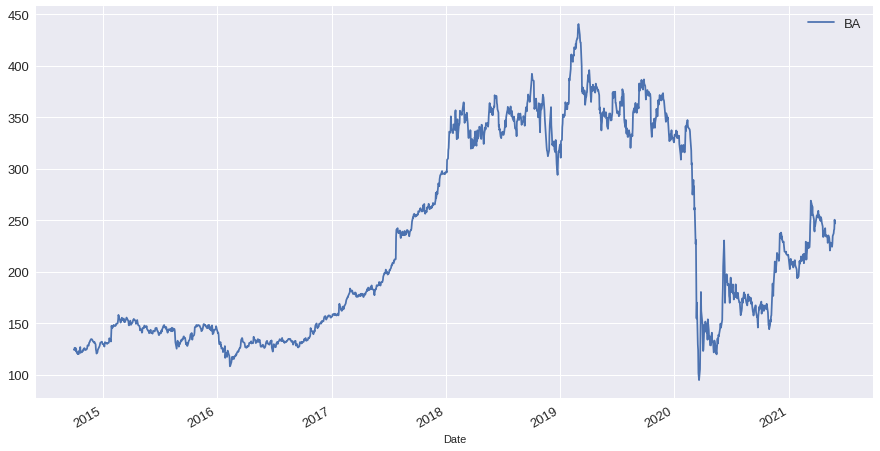

In [25]:
close.BA.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

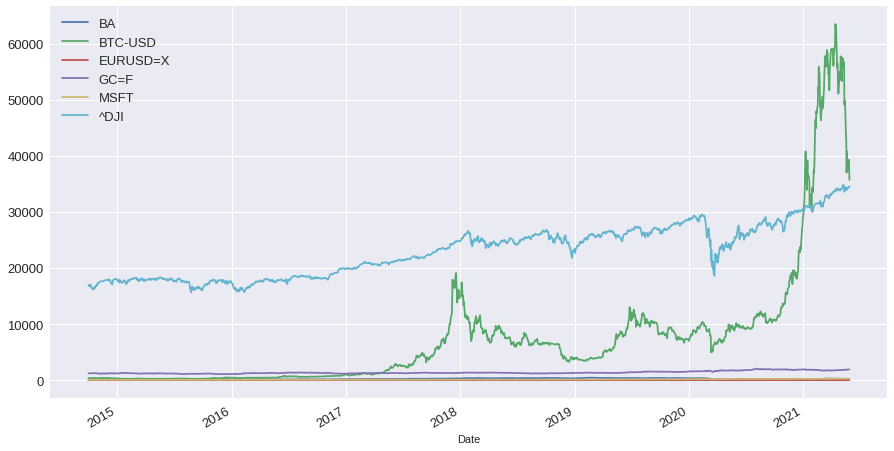

In [26]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Normalizing Financial Time Series to a Base Value (100)

__-> all instruments start at the very same Level (Base Value)__

In [27]:
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [28]:
close.iloc[0,0] # first price BA

124.66999816894533

In [29]:
close.BA.div(close.iloc[0,0]).mul(100)

Date
2014-10-01   100.0000
2014-10-02    99.5989
2014-10-03   101.3556
2014-10-04        NaN
2014-10-05        NaN
               ...   
2021-05-26   193.6071
2021-05-27   201.0909
2021-05-28   198.1391
2021-05-29        NaN
2021-05-30        NaN
Name: BA, Length: 2434, dtype: float64

In [30]:
close.iloc[0] # first Price all tickers

BA           124.6700
BTC-USD      383.6150
EURUSD=X       1.2628
GC=F        1214.6000
MSFT          45.9000
^DJI       16804.7109
Name: 2014-10-01 00:00:00, dtype: float64

In [31]:
norm = close.div(close.iloc[0]).mul(100)
norm

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
2014-10-02,99.5989,97.7730,99.9672,99.9671,99.6950,99.9782
2014-10-03,101.3556,93.7169,100.3345,98.1558,100.4139,101.2198
2014-10-04,NaN,85.7281,NaN,NaN,NaN,NaN
2014-10-05,NaN,83.5499,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,193.6071,10243.1344,96.9969,156.5371,547.9085,204.2466
2021-05-27,201.0909,10019.6733,96.5495,156.0761,543.1590,205.0892
2021-05-28,198.1391,9305.5815,96.5542,156.6359,543.9651,205.4748


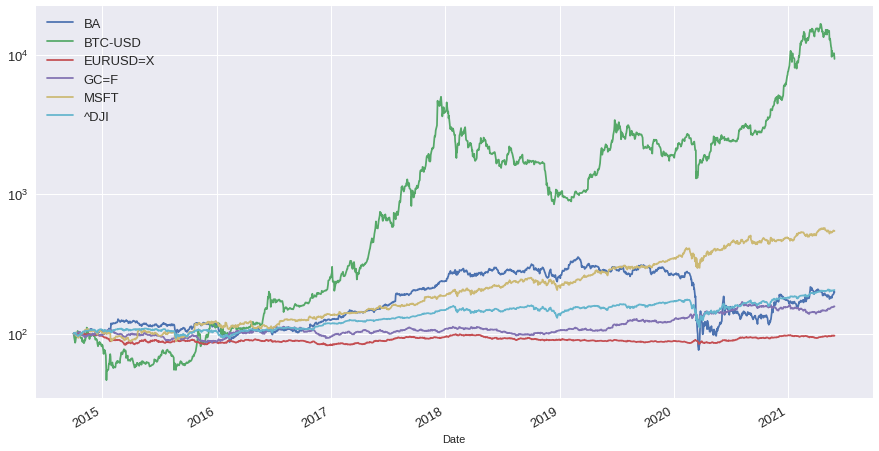

In [32]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()

In [33]:
close.to_csv("close.csv")

## Price Changes and Financial Returns

__More meaningful/useful than Prices: Price changes__

In [35]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [36]:
msft = close.MSFT.dropna().to_frame().copy()

In [38]:
msft.rename(columns = {"MSFT":"Price"}, inplace = True)

In [41]:
msft["P_lag1"] = msft.shift(periods = 1)
msft

,Price,P_lag1
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,45.9000
2014-10-03,46.0900,45.7600
2014-10-06,46.0900,46.0900
2014-10-07,45.5300,46.0900
...,...,...
2021-05-24,250.7800,245.1700
2021-05-25,251.7200,250.7800
2021-05-26,251.4900,251.7200


__Absolute Price Changes__ (Difference)

In [42]:
msft["P_diff"] = msft.Price.sub(msft.P_lag1) # Alternative 1

In [43]:
msft

,Price,P_lag1,P_diff
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,45.9000,-0.1400
2014-10-03,46.0900,45.7600,0.3300
2014-10-06,46.0900,46.0900,0.0000
2014-10-07,45.5300,46.0900,-0.5600
...,...,...,...
2021-05-24,250.7800,245.1700,5.6100
2021-05-25,251.7200,250.7800,0.9400
2021-05-26,251.4900,251.7200,-0.2300


In [44]:
msft["P_diff2"] = msft.Price.diff(periods = 1)  # Alternative 2

In [45]:
msft

,Price,P_lag1,P_diff,P_diff2
Date,,,,
2014-10-01,45.9000,NaN,NaN,NaN
2014-10-02,45.7600,45.9000,-0.1400,-0.1400
2014-10-03,46.0900,45.7600,0.3300,0.3300
2014-10-06,46.0900,46.0900,0.0000,0.0000
2014-10-07,45.5300,46.0900,-0.5600,-0.5600
...,...,...,...,...
2021-05-24,250.7800,245.1700,5.6100,5.6100
2021-05-25,251.7200,250.7800,0.9400,0.9400
2021-05-26,251.4900,251.7200,-0.2300,-0.2300


In [46]:
msft.P_diff.equals(msft.P_diff2)

True

__-> Absolute Price Changes are not meaningful__

__Relative/Percentage Price Changes__ (Returns)

In [47]:
msft.Price.div(msft.P_lag1) - 1 # Alternative 1

Date
2014-10-01       NaN
2014-10-02   -0.0031
2014-10-03    0.0072
2014-10-06    0.0000
2014-10-07   -0.0122
               ...  
2021-05-24    0.0229
2021-05-25    0.0037
2021-05-26   -0.0009
2021-05-27   -0.0087
2021-05-28    0.0015
Length: 1677, dtype: float64

In [48]:
msft["Returns"] = msft.Price.pct_change(periods = 1) # Alternative 2
msft

,Price,P_lag1,P_diff,P_diff2,Returns
Date,,,,,
2014-10-01,45.9000,NaN,NaN,NaN,NaN
2014-10-02,45.7600,45.9000,-0.1400,-0.1400,-0.0031
2014-10-03,46.0900,45.7600,0.3300,0.3300,0.0072
2014-10-06,46.0900,46.0900,0.0000,0.0000,0.0000
2014-10-07,45.5300,46.0900,-0.5600,-0.5600,-0.0122
...,...,...,...,...,...
2021-05-24,250.7800,245.1700,5.6100,5.6100,0.0229
2021-05-25,251.7200,250.7800,0.9400,0.9400,0.0037
2021-05-26,251.4900,251.7200,-0.2300,-0.2300,-0.0009


In [51]:
msft.drop(columns = ["P_lag1", "P_diff", "P_diff2"], inplace = True)

In [53]:
msft.to_csv("msft.csv")

## Measuring Reward and Risk of an Investment

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

In [55]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


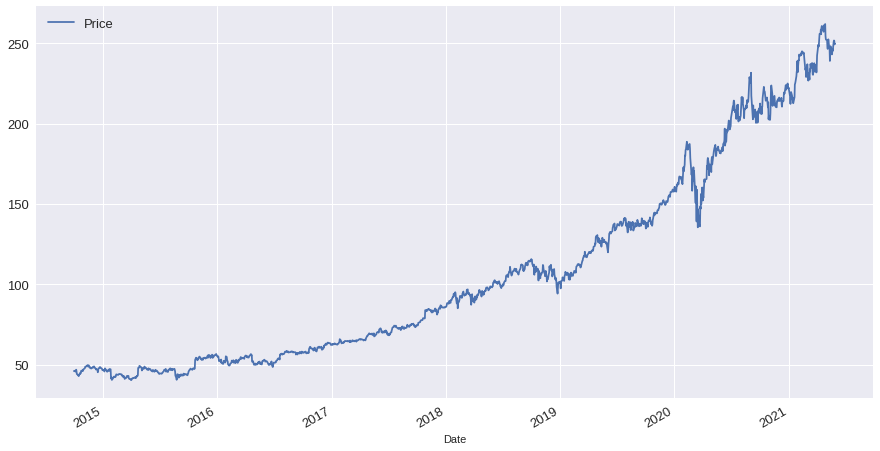

In [56]:
msft.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

- Reward: Positive Returns
- Risk: Volatility of Returns

In [57]:
msft.describe()

,Price,Returns
count,1677.0000,1676.0000
mean,106.3144,0.0012
std,60.7722,0.0173
min,40.2900,-0.1474
25%,54.8300,-0.0062
50%,89.7100,0.0009
75%,138.9000,0.0091
max,261.9700,0.1422


In [58]:
mu = msft.Returns.mean() # arithmetic mean return -> Reward
mu

0.0011597817982067049

In [59]:
sigma = msft.Returns.std() # standard deviation of returns -> Risk/Volatility
sigma

0.017256078433477862

In [60]:
np.sqrt(msft.Returns.var())

0.017256078433477862

## Investment Multiple and CAGR 

__Two alternative reward metrics that are more intuitive and easier to interpret.__

In [62]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


__Investment Multiple__: Ending Value of 1 [Dollar] invested. <br>
Multiple = Ending Value / Initial Investment

In [63]:
multiple = (msft.Price[-1] / msft.Price[0])
multiple

5.43965107571966

__Price Increase (in %)__

In [64]:
(multiple - 1) * 100

443.96510757196603

In [65]:
msft.Price / msft.Price[0] # similar/identical concept: Normalized Price with Base Value 1

Date
2014-10-01   1.0000
2014-10-02   0.9969
2014-10-03   1.0041
2014-10-06   1.0041
2014-10-07   0.9919
              ...  
2021-05-24   5.4636
2021-05-25   5.4841
2021-05-26   5.4791
2021-05-27   5.4316
2021-05-28   5.4397
Name: Price, Length: 1677, dtype: float64

In [66]:
start = msft.index[0]
start

Timestamp('2014-10-01 00:00:00')

In [67]:
end = msft.index[-1]
end

Timestamp('2021-05-28 00:00:00')

In [68]:
td = end - start
td

Timedelta('2431 days 00:00:00')

In [69]:
td_years = td.days / 365.25
td_years

6.655715263518139

In [70]:
cagr = multiple**(1 / td_years) - 1 # short version
cagr

0.2897846506194157

In [71]:
cagr = (msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1 # long
cagr

0.2897846506194157

In [72]:
(1 + cagr)**(td_years) # alternative #2 to calculate multiple (cagr)

5.439651075719659

## Compound Returns & Geometric Mean Return

In [73]:
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [74]:
multiple = (1 + msft.Returns).prod() # alternative #3 to calculate multiple (compounding daily returns)
multiple

5.4396510757198575

In [75]:
n = msft.Returns.count()
n

1676

In [76]:
geo_mean = multiple**(1/n) - 1 # Geometric mean return (daily)
geo_mean

0.0010110805580043625

In [77]:
(1 + geo_mean)**n # alternative #4 to calculate multiple (geometric mean)

5.439651075720363

__-> Compound returns, CAGR & geometric mean return are closely related concepts__.

In [78]:
mu = msft.Returns.mean() # arithmetic mean return
mu

0.0011597817982067049

## Preview: Simple Returns vs. Logarithmic Returns (log returns)

Very often log returns are used instead of simple returns.<br>
- favourable characteristics of log returns
- drawbacks of simple returns

## Discrete Compounding

__Annual Compounding__ -> Interests accrue once a year at the end of the year

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __annual compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account once at the end of each year.__

In [80]:
PV = 100
r = 0.08
n = 1

In [81]:
100 * 1.08

108.0

In [82]:
FV = PV * (1 + r)**n
FV

108.0

In [83]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

0.08000000000000007

__Quarterly Compounding__ -> Interests accrue once a quarter at the end of the quarter

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __quarterly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each quarter.__

In [84]:
PV = 100
r = 0.08
n = 1
m = 4

In [85]:
100 * 1.02 * 1.02 * 1.02 * 1.02

108.243216

In [86]:
FV = PV * (1 + r/m)**(n*m)
FV

108.243216

In [87]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

0.08243215999999998

__-> Quarterly compounding is favourable (everything else equal) as we earn compound interest (interest on interest).__

__Monthly Compounding__ -> Interests accrue once a month at the end of the month

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __monthly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each month.__

In [88]:
PV = 100
r = 0.08
n = 1
m = 12

In [89]:
FV = PV * (1 + r/m)**(n*m)
FV

108.29995068075098

In [90]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) 
effective_annual_rate

0.08299950680750978

## Continuous Compounding 

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __continuous compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account continuously (infinitely large number of compounding events).__ -> continuous exponential growth that can be observed in nature

In [92]:
PV = 100
r = 0.08
n = 1
m = 100000 # approx.infinity

In [93]:
FV = PV * (1 + r/m)**(n*m) # approx. with large m
FV

108.32870330122834

In [94]:
FV = PV * np.exp(n * r) # exact math with e (euler number)
FV

108.32870676749586

In [95]:
euler = np.exp(1)
euler

2.718281828459045

In [96]:
PV * euler**(n * r)

108.32870676749586

In [97]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) # Alt 1
effective_annual_rate

0.08328706767495864

In [98]:
effective_annual_rate = np.exp(r) - 1 # Alt 2
effective_annual_rate

0.08328706767495864

Let´s assume we only observe PV and FV, how to calculate the stated rate/continuously compounded rate of 8%?

In [99]:
r = np.log(FV / PV) # inverse calculation -> use log (Alt 1)
r

0.08000000000000007

In [100]:
r = np.log(effective_annual_rate + 1) # inverse calculation -> use log (Alt 2)
r

0.08000000000000007

## Log Returns

In [101]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [102]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.900002,NaN
2014-10-02,45.759998,-0.003050
2014-10-03,46.090000,0.007212
2014-10-06,46.090000,0.000000
2014-10-07,45.529999,-0.012150
...,...,...
2021-05-24,250.779999,0.022882
2021-05-25,251.720001,0.003748
2021-05-26,251.490005,-0.000914


In [103]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) # daily log returns

In [104]:
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.900002,NaN,NaN
2014-10-02,45.759998,-0.003050,-0.003055
2014-10-03,46.090000,0.007212,0.007186
2014-10-06,46.090000,0.000000,0.000000
2014-10-07,45.529999,-0.012150,-0.012225
...,...,...,...
2021-05-24,250.779999,0.022882,0.022624
2021-05-25,251.720001,0.003748,0.003741
2021-05-26,251.490005,-0.000914,-0.000914


In [105]:
msft.describe()

,Price,Returns,log_ret
count,1677.000000,1676.000000,1676.000000
mean,106.314377,0.001160,0.001011
std,60.772246,0.017256,0.017249
min,40.290001,-0.147390,-0.159453
25%,54.830002,-0.006177,-0.006196
50%,89.709999,0.000918,0.000918
75%,138.899994,0.009110,0.009069
max,261.970001,0.142169,0.132929


In [106]:
mu = msft.log_ret.mean() # mean log return -> Reward
mu

0.0010105697603329637

In [107]:
sigma = msft.log_ret.std() # standard deviation of log returns -> Risk/Volatility
sigma

0.01724882682847896

## Simple Returns vs Log Returns

In [109]:
df = pd.DataFrame(data = [100, 50, 90], columns = ["Price"])
df

,Price
0,100
1,50
2,90


In [110]:
df["SR"] = df.Price.pct_change() # simple returns

In [111]:
df["LR"] = np.log(df.Price / df.Price.shift()) # log returns

In [112]:
df

,Price,SR,LR
0,100,NaN,NaN
1,50,-0.500000,-0.693147
2,90,0.800000,0.587787


In [113]:
periods = df.SR.count()
periods

2

__The arithmetic mean of simple returns can be misleading!__

In [114]:
mean_sr = df.SR.mean()
mean_sr

0.15000000000000002

__We should use Compound Simple Returns / Geometric Mean, or even better...__

In [116]:
geo_mean = (1 + df.SR).prod()**(1 / periods) - 1
geo_mean

-0.05131670194948623

In [117]:
100 * (1 + geo_mean)**periods # correct!!!

89.99999999999999

__...Log Returns which are additive over time!__

In [118]:
sum_lr = df.LR.sum()
sum_lr

-0.10536051565782623

In [119]:
100 * np.exp(sum_lr) # correct!!!

90.0

In [120]:
mean_lr = df.LR.mean()
mean_lr

-0.05268025782891311

In [121]:
100 * np.exp(mean_lr * periods) # correct!!!

90.0

In [123]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])

In [124]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [125]:
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.900002,NaN,NaN
2014-10-02,45.759998,-0.003050,-0.003055
2014-10-03,46.090000,0.007212,0.007186
2014-10-06,46.090000,0.000000,0.000000
2014-10-07,45.529999,-0.012150,-0.012225
...,...,...,...
2021-05-24,250.779999,0.022882,0.022624
2021-05-25,251.720001,0.003748,0.003741
2021-05-26,251.490005,-0.000914,-0.000914


__Investment Multiple__

In [126]:
msft.Returns.add(1).prod() # compounding simple returns ("compound returns")

5.4396510757198575

In [127]:
np.exp(msft.log_ret.sum())  # adding log returns ("cumulative returns")

5.439651075719645

__Normalized Prices with Base 1__

In [128]:
msft.Returns.add(1).cumprod() # compounding simple returns ("compound returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   5.463616
2021-05-25   5.484096
2021-05-26   5.479085
2021-05-27   5.431590
2021-05-28   5.439651
Name: Returns, Length: 1677, dtype: float64

In [129]:
np.exp(msft.log_ret.cumsum()) # adding log returns ("cumulative returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   5.463616
2021-05-25   5.484096
2021-05-26   5.479085
2021-05-27   5.431590
2021-05-28   5.439651
Name: log_ret, Length: 1677, dtype: float64

In [130]:
msft.log_ret.cumsum().apply(np.exp) # adding log returns ("cumulative returns")

Date
2014-10-01        NaN
2014-10-02   0.996950
2014-10-03   1.004139
2014-10-06   1.004139
2014-10-07   0.991939
               ...   
2021-05-24   5.463616
2021-05-25   5.484096
2021-05-26   5.479085
2021-05-27   5.431590
2021-05-28   5.439651
Name: log_ret, Length: 1677, dtype: float64

__CAGR__

In [131]:
(msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1

0.2897846506194157

In [132]:
trading_days_year = msft.Returns.count() / ((msft.index[-1] - msft.index[0]).days / 365.25)
trading_days_year

251.81365693130397

In [133]:
np.exp(msft.log_ret.mean() * trading_days_year) - 1 # correct with mean of daily log returns!

0.28978465061941483

In [134]:
msft.Returns.mean() * trading_days_year # incorrect with mean of daily simple returns!

0.292048895848794

In [135]:
np.exp(msft.log_ret.mean() * 252) - 1 # good approximation (for us stocks)

0.2900275562814376

## Performance Comparison

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

__Which instrument(s) performed best/worst in the past in terms of risk & return?__

In [137]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [138]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1677 non-null   float64
 1   BTC-USD   2434 non-null   float64
 2   EURUSD=X  1735 non-null   float64
 3   GC=F      1674 non-null   float64
 4   MSFT      1677 non-null   float64
 5   ^DJI      1677 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


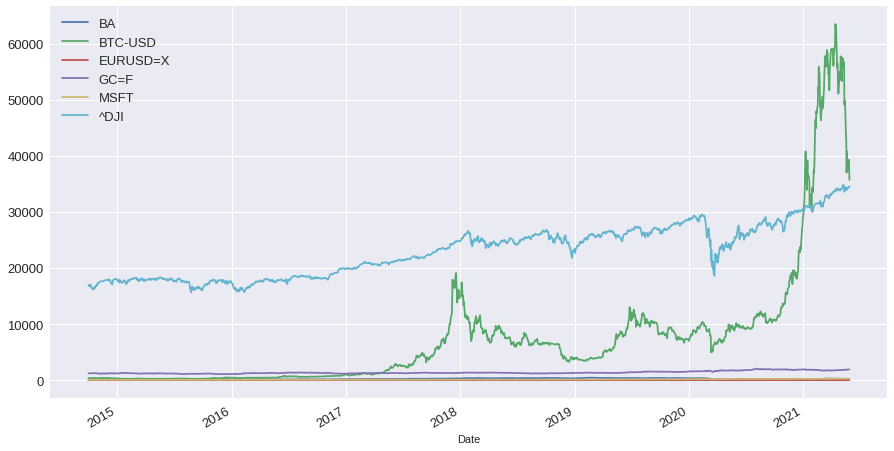

In [139]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [140]:
np.log(close / close.shift()).info() # keep NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1312 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1384 non-null   float64
 3   GC=F      1309 non-null   float64
 4   MSFT      1312 non-null   float64
 5   ^DJI      1312 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [141]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() # remove NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [142]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,0.0026,0.0230,0.0028,0.0017,-0.0009,0.0003
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019


In [143]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2434 entries, 2014-10-01 to 2021-05-30
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1676 non-null   float64
 1   BTC-USD   2433 non-null   float64
 2   EURUSD=X  1734 non-null   float64
 3   GC=F      1673 non-null   float64
 4   MSFT      1676 non-null   float64
 5   ^DJI      1676 non-null   float64
dtypes: float64(6)
memory usage: 133.1 KB


In [144]:
returns.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,1676.0000,2433.0000,1734.0000,1673.0000,1676.0000,1676.0000
mean,0.0004,0.0019,-0.0000,0.0003,0.0010,0.0004
std,0.0263,0.0395,0.0051,0.0094,0.0172,0.0120
min,-0.2724,-0.4647,-0.0281,-0.0511,-0.1595,-0.1384
25%,-0.0092,-0.0123,-0.0031,-0.0042,-0.0062,-0.0034
50%,0.0007,0.0020,-0.0000,0.0003,0.0009,0.0007
75%,0.0105,0.0178,0.0029,0.0051,0.0091,0.0054
max,0.2177,0.2251,0.0281,0.0578,0.1329,0.1076


In [145]:
summary = returns.agg(["mean", "std"]).T
summary

,mean,std
BA,0.0004,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0010,0.0172
^DJI,0.0004,0.0120


In [146]:
summary.columns = ["Mean", "Std"]
summary

,Mean,Std
BA,0.0004,0.0263
BTC-USD,0.0019,0.0395
EURUSD=X,-0.0000,0.0051
GC=F,0.0003,0.0094
MSFT,0.0010,0.0172
^DJI,0.0004,0.0120


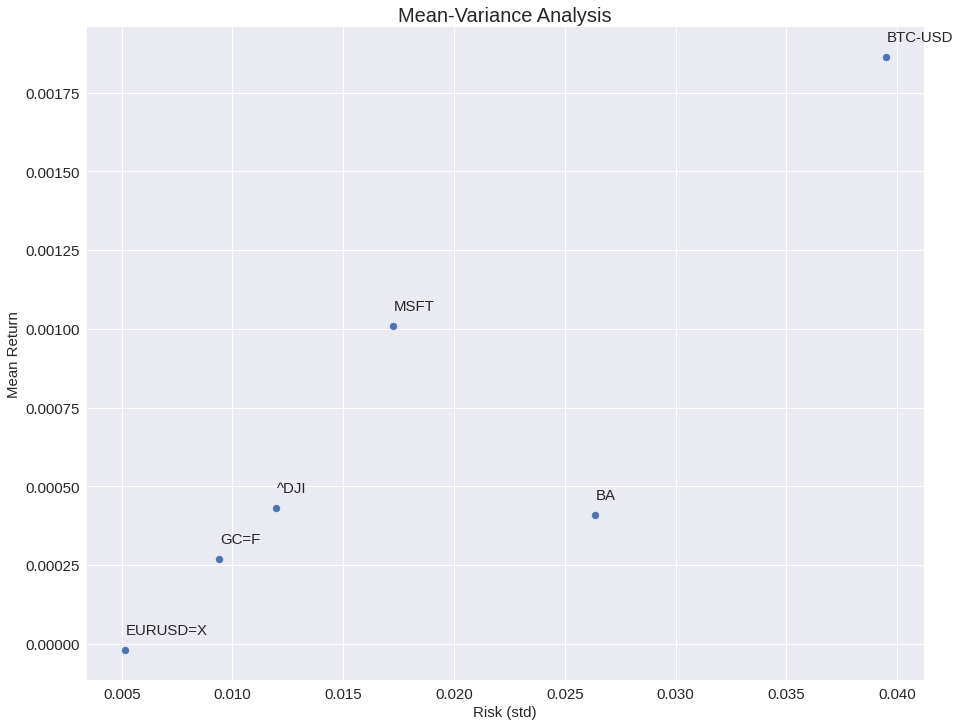

In [147]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

-> There is __no clear "best-performer"__ among ["EURUSD=X", "GC=F", "^DJI", "MSFT", "BTC-USD"] (without further analysis). __Higher risk__ is getting rewarded with __higher returns__. __BA underperformed__.

## Normality of Financial Returns 

In [149]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [150]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) 
msft

,Price,Returns,log_ret
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2021-05-24,250.7800,0.0229,0.0226
2021-05-25,251.7200,0.0037,0.0037
2021-05-26,251.4900,-0.0009,-0.0009


In [151]:
msft.describe()

,Price,Returns,log_ret
count,1677.0000,1676.0000,1676.0000
mean,106.3144,0.0012,0.0010
std,60.7722,0.0173,0.0172
min,40.2900,-0.1474,-0.1595
25%,54.8300,-0.0062,-0.0062
50%,89.7100,0.0009,0.0009
75%,138.9000,0.0091,0.0091
max,261.9700,0.1422,0.1329


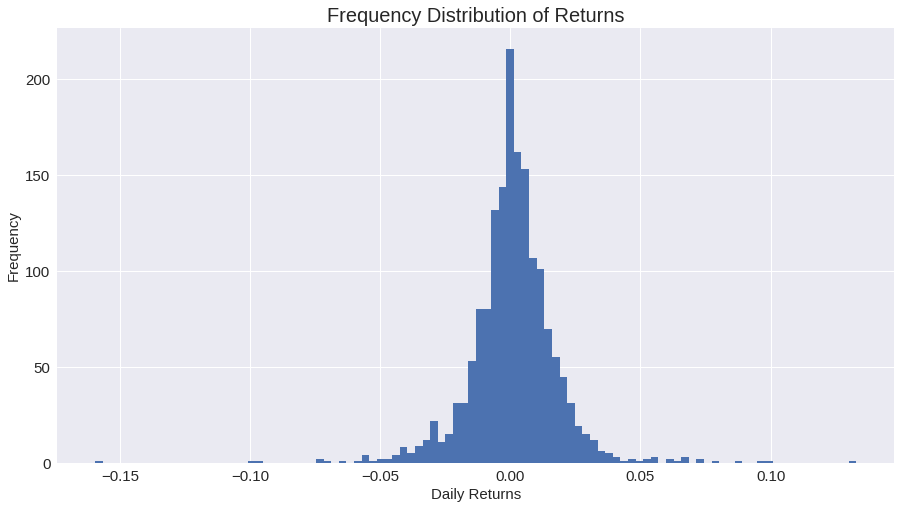

In [152]:
msft.log_ret.plot(kind = "hist", figsize = (15 ,8), bins = 100, fontsize = 15, density = False) # Frequency Distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

__Do MSFT Returns follow a Normal Distribution?__ <br><br>
A normally distributed random variable can be fully described by its 
- mean
- standard deviation

Higher Central Moments are zero:
- Skew = 0 (measures symmetrie around the mean)
- (Excess) Kurtosis = 0 (positve excess Kurtosis -> more observations in the "tails")

In [153]:
mu = msft.log_ret.mean()
mu

0.0010105697603329637

In [154]:
sigma = msft.log_ret.std()
sigma

0.01724882682847896

In [156]:
stats.skew(msft.log_ret.dropna()) # in a Normal Distribution: skew == 0

-0.20070528675208313

In [157]:
stats.kurtosis(msft.log_ret.dropna(), fisher = True) # in a Normal Distribution: (fisher) kurtosis == 0

10.733092631202133

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__

In [158]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
x

array([-0.15945341, -0.15942417, -0.15939493, ...,  0.1328705 ,
        0.13289974,  0.13292898])

In [159]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
y

array([3.72735695e-18, 3.78660080e-18, 3.84677524e-18, ...,
       4.72250419e-12, 4.66169105e-12, 4.60164778e-12])

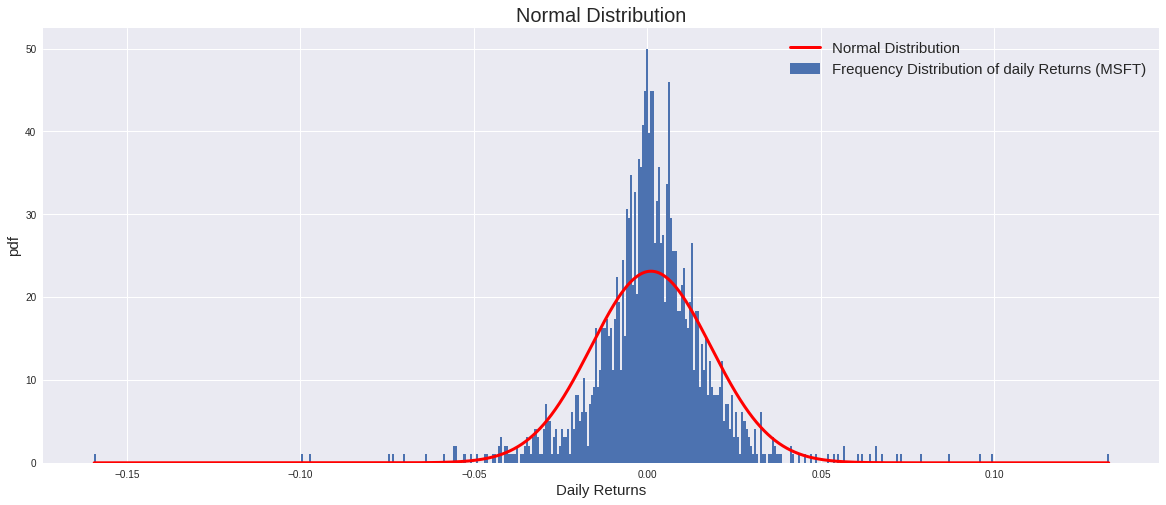

In [160]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__ 

In [161]:
z_stat, p_value = stats.normaltest(msft.log_ret.dropna())

In [162]:
z_stat # high values -> reject H0

326.8451656349759

In [163]:
p_value # low values (close to zero) -> reject H0

1.0628551078061005e-71

In [164]:
round(p_value, 10)

0.0

__-> Assuming that MSFT Returns (generally) follow a Normal Distribution, there is 0% probability that we get that extreme outcomes in a sample.__ 

## Annualizing Mean Return and Std of Returns

In [166]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"], usecols = ["Date", "Price"])

In [167]:
msft

,Price
Date,
2014-10-01,45.900002
2014-10-02,45.759998
2014-10-03,46.090000
2014-10-06,46.090000
2014-10-07,45.529999
...,...
2021-05-24,250.779999
2021-05-25,251.720001
2021-05-26,251.490005


In [168]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [169]:
msft.log_ret.agg(["mean", "std"]) # mean and std based on daily returns

mean   0.001011
std    0.017249
Name: log_ret, dtype: float64

In [170]:
ann_mu = msft.log_ret.mean() * 252 
ann_mu

0.25466357960390684

In [171]:
cagr = np.exp(ann_mu) - 1 # don´t mix up with cagr
cagr

0.2900275562814376

In [172]:
ann_std = msft.log_ret.std() * np.sqrt(252) 
ann_std

0.27381663717464577

In [173]:
ann_std = np.sqrt(msft.log_ret.var() * 252) # annualized std of returns (Alt 2)
ann_std

0.27381663717464577

## Resampling / Smoothing

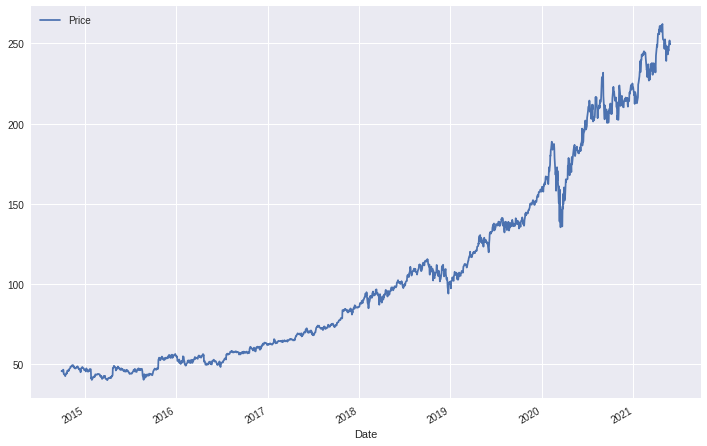

In [174]:
msft.Price.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [175]:
monthly = msft.Price.resample("M").last() ## resample to monthly (month end)
monthly

Date
2014-10-31    46.950001
2014-11-30    47.810001
2014-12-31    46.450001
2015-01-31    40.400002
2015-02-28    43.849998
                ...    
2021-01-31   231.960007
2021-02-28   232.380005
2021-03-31   235.770004
2021-04-30   252.179993
2021-05-31   249.679993
Freq: M, Name: Price, Length: 80, dtype: float64

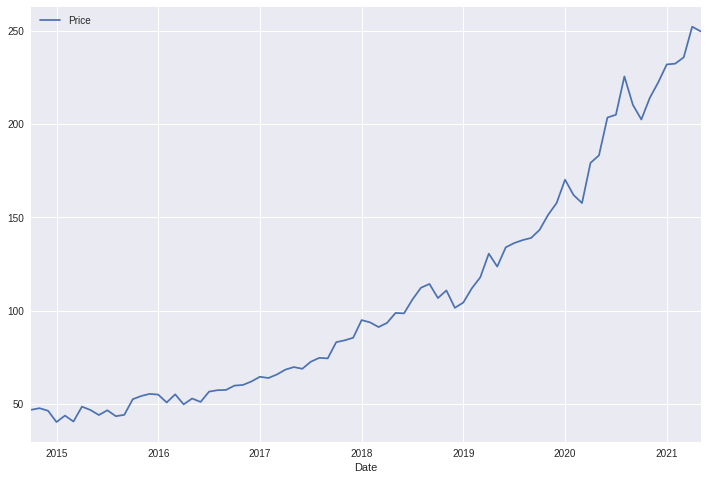

In [176]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show()

__How will the Mean-Variance Analysis change with smoothed data?__

In [177]:
freqs = ["A", "Q", "M", "W-Fri", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [178]:
for i in range(5):
    resamp = msft.Price.resample(freqs[i]).last() # resample
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i]) # calc. annualized mean
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc. annualized std

In [179]:
ann_mean

[0.24025765527761309,
 0.258739013375891,
 0.253837495704879,
 0.25319415287153213,
 0.25289038013157533]

In [180]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

,ann_std,ann_mean
A,0.127250,0.240258
Q,0.179314,0.258739
M,0.204970,0.253837
W-Fri,0.230859,0.253194
D,0.267372,0.252890


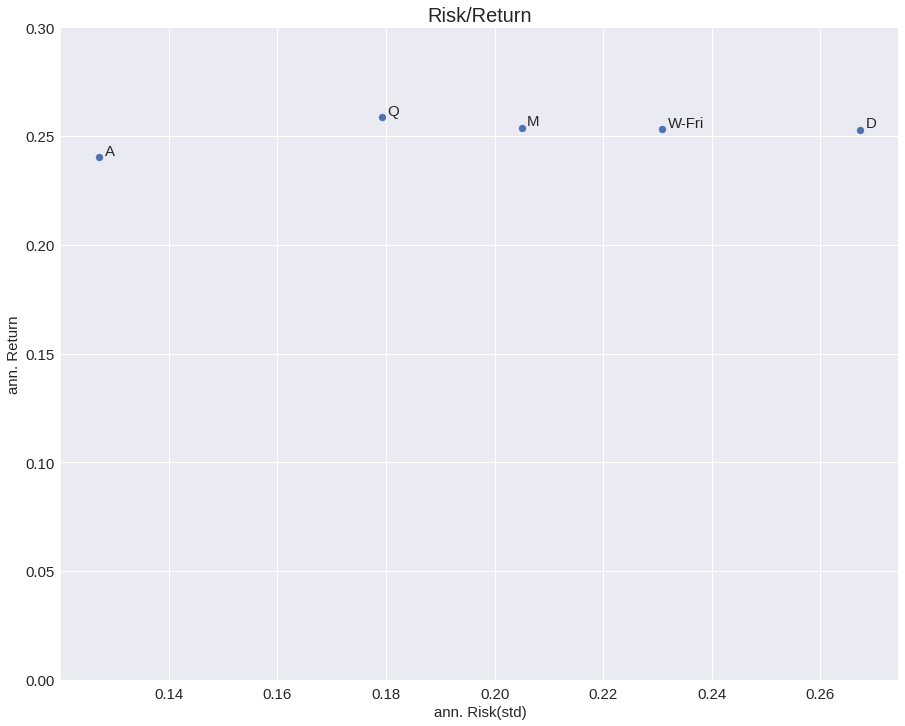

In [181]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__-> Smoothing reduces (observed) Risk__. 

Dubious practices:
- Managing (Manipulating) Performance in Performance Reportings.
- Comparing assets with different granularity and pricing mechanisms -> e.g. non-listed (alternative assets) vs. listed assets 
- Adjusting granularity to investor´s (average) holding period -> Volatility is still there.

## Rolling Statistics

__(Another) general Rule in Finance/Investing: Past performance is not an indicator of future performance__.

In [182]:
msft

,Price,log_ret
Date,,
2014-10-01,45.900002,NaN
2014-10-02,45.759998,-0.003055
2014-10-03,46.090000,0.007186
2014-10-06,46.090000,0.000000
2014-10-07,45.529999,-0.012225
...,...,...
2021-05-24,250.779999,0.022624
2021-05-25,251.720001,0.003741
2021-05-26,251.490005,-0.000914


In [183]:
ann_mu = msft.log_ret.mean() * 252 # annualized mean return
ann_mu

0.25466357960390684

In [184]:
ann_std = msft.log_ret.std() * np.sqrt(252) # annualized std of returns (Alt 1)
ann_std

0.27381663717464577

__Are Return and Risk constant over time? No, of course not! They change over time.__

__Let´s measure/quantify this with rolling statistics!__

In [185]:
window = 252 # rolling window 252 trading days (~ 1 Year)

In [186]:
msft.log_ret.rolling(window = 252)

Rolling [window=252,center=False,axis=0,method=single]

In [187]:
msft.log_ret.rolling(window = 252).sum() # Alt 1

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.312307
2021-05-25   0.326676
2021-05-26   0.324441
2021-05-27   0.317993
2021-05-28   0.309329
Name: log_ret, Length: 1677, dtype: float64

In [188]:
roll_mean = msft.log_ret.rolling(window = 252).mean() * 252 # Alt 2
roll_mean

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.312307
2021-05-25   0.326676
2021-05-26   0.324441
2021-05-27   0.317993
2021-05-28   0.309329
Name: log_ret, Length: 1677, dtype: float64

In [189]:
roll_mean.iloc[250:]

Date
2015-09-29         NaN
2015-09-30         NaN
2015-10-01   -0.028507
2015-10-02   -0.004161
2015-10-05    0.011648
                ...   
2021-05-24    0.312307
2021-05-25    0.326676
2021-05-26    0.324441
2021-05-27    0.317993
2021-05-28    0.309329
Name: log_ret, Length: 1427, dtype: float64

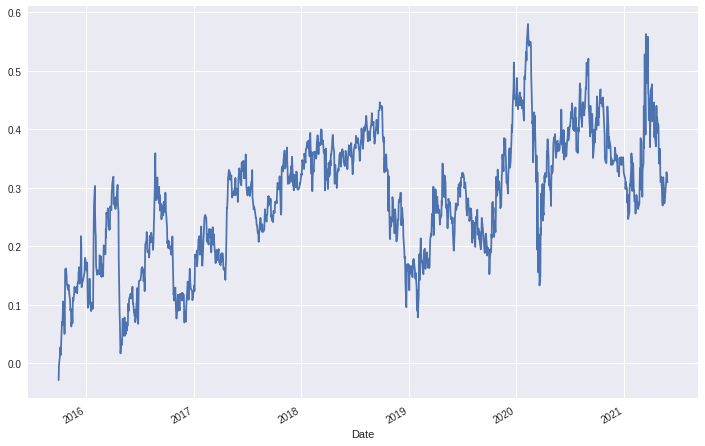

In [190]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [191]:
roll_std = msft.log_ret.rolling(window = 252).std() * np.sqrt(252)
roll_std

Date
2014-10-01        NaN
2014-10-02        NaN
2014-10-03        NaN
2014-10-06        NaN
2014-10-07        NaN
               ...   
2021-05-24   0.279428
2021-05-25   0.279185
2021-05-26   0.279194
2021-05-27   0.279350
2021-05-28   0.279208
Name: log_ret, Length: 1677, dtype: float64

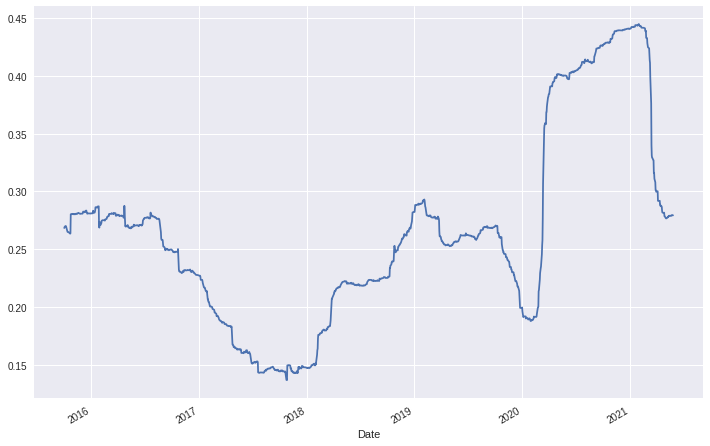

In [192]:
roll_std.plot(figsize = (12, 8))
plt.show()

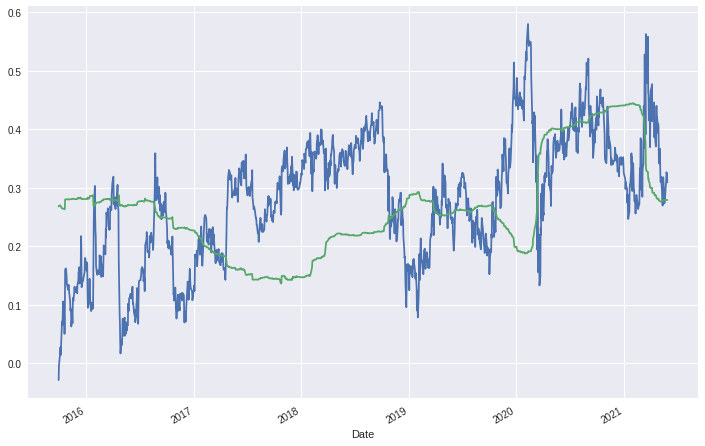

In [193]:
roll_mean.plot(figsize = (12, 8))
roll_std.plot()
plt.show()

In [194]:
sma_window = 50

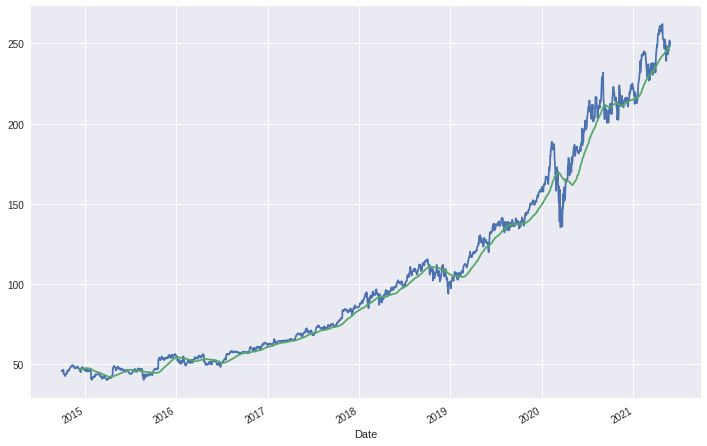

In [195]:
msft.Price.plot(figsize = (12, 8))
msft.Price.rolling(sma_window).mean().plot()
plt.show()

# Covariance and Correlation

In [217]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492


In [218]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109,0.7919
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508,0.7921
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895,0.7892
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,320.5100,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,241.3700,39294.1992,1.2249,1901.3000,251.4900,34323.0508,0.8164
2021-05-27,250.7000,38436.9688,1.2193,1895.7000,249.3100,34464.6406,0.8202
2021-05-28,247.0200,35697.6055,1.2193,1902.5000,249.6800,34529.4492,0.8201


In [219]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
Date,,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002,0.0003
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123,-0.0037
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN,NaN
2014-10-05,NaN,-0.0257,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-05-26,0.0026,0.0230,0.0028,0.0017,-0.0009,0.0003,-0.0028
2021-05-27,0.0379,-0.0221,-0.0046,-0.0029,-0.0087,0.0041,0.0046
2021-05-28,-0.0148,-0.0739,0.0000,0.0036,0.0015,0.0019,-0.0000


In [220]:
returns.cov() # covariance (hard to interpret)

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
BA,0.0007,0.0001,0.0000,0.0000,0.0002,0.0002,-0.0000
BTC-USD,0.0001,0.0016,-0.0000,0.0000,0.0001,0.0001,0.0000
EURUSD=X,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000
GC=F,0.0000,0.0000,0.0000,0.0001,-0.0000,-0.0000,-0.0000
MSFT,0.0002,0.0001,-0.0000,-0.0000,0.0003,0.0002,0.0000
^DJI,0.0002,0.0001,0.0000,-0.0000,0.0002,0.0001,-0.0000
USDEUR=X,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000


In [221]:
returns.corr() # correlation coefficient (easy to interpret)

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI,USDEUR=X
BA,1.0000,0.1323,0.0347,0.0048,0.4221,0.7253,-0.0347
BTC-USD,0.1323,1.0000,-0.0163,0.0986,0.1450,0.1604,0.0163
EURUSD=X,0.0347,-0.0163,1.0000,0.0565,-0.0191,0.0295,-1.0000
GC=F,0.0048,0.0986,0.0565,1.0000,-0.0008,-0.0121,-0.0565
MSFT,0.4221,0.1450,-0.0191,-0.0008,1.0000,0.7422,0.0191
^DJI,0.7253,0.1604,0.0295,-0.0121,0.7422,1.0000,-0.0295
USDEUR=X,-0.0347,0.0163,-1.0000,-0.0565,0.0191,-0.0295,1.0000


Three cases:
- no correlation: __correlation coefficient == 0__
- moving together: __0 < correlation coefficient <= 1__ (positive)
- moving in opposite directions: __-1 <= correlation coefficient < 0__ (negative)

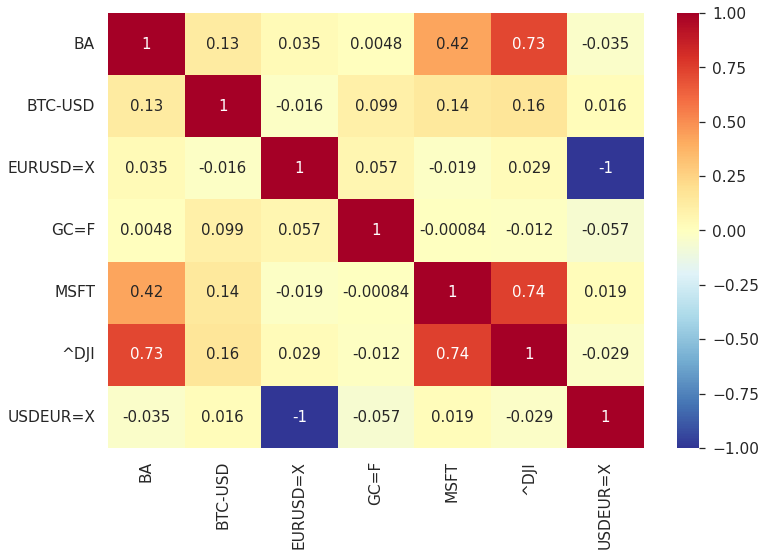

In [223]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()